# Plot loss curve and show inference sentences
## Pre-training 
### emotion dialogue data (cleaning)
* loss ... over fitting in early steps
* inference(10 Epoch) ... valid data: most of sentences are similar and have many [数詞] [人名]

* inference(30 Eposh) ... train data: not changing each emotion
### OpenSubtitles 
* loss ... validation loss is not stable
* inference(13 Epoch) ... most of them have only one word (but short input and reference)
### twitter dataset
* loss ... smooth curve (valid decrease, increase)
* inference(5 Epoch) ... natural but simple and dull

## Fine-tuning
* all loss curve ... over-fitting in early steps
### Op_sub -> emo_dial (cleaning)
* inference(13 Epoch -> 4 Epoch, 13 Epoch -> 2 Epoch) ... many repitition
### Twitter -> emo_dial (cleaning)
* inference(5 Epoch -> 4 Epoch) ... more natural but many  [数詞] [人名]
### Twitter -> emo_dial (all) 
* infenrence(5 Epoch -> 2 Epoch) ... more various but many  [数詞] [人名] but domain can't  be decided
### Twitter -> emo_dial (all)  -> emo_dial (cleaning)
* infenrence(5 Epoch -> 2 Epoch -> ) ... more various but many  [数詞] [人名]

In [141]:
from matplotlib import pyplot as plt
import numpy as np

In [217]:
def plot_loss(log_path, MAX=-1,y_max=None):
    f = open(log_path, 'r')
    log_line = f.readlines()
    [print(log_line[i]) for i in range(3)]
    
    log_valid = [float(i.split(" ")[3].strip('\n')) for i in log_line if i.split(" ")[0] == "Valid"]
    log_train = [float(i.split(" ")[4].strip('\n')) for i in log_line if i.split(" ")[0] == "Train"]
    log_val = log_valid[1:MAX+1]
    log_train = log_train[:MAX]
    x = np.arange(len(log_val))
    y1 = np.array(log_train)
    y2 = np.array(log_val)
    plt.plot(x,y1)
    plt.plot(x,y2)
    plt.show

In [228]:
log_path_em = "../emotion_dialogue_model/log/train20190203010803.log"
log_path_op = "../emotion_dialogue_model/log/train20190128001146.log" 
log_path_tw = "../emotion_dialogue_model/log/train20190128001030.log" 
log_path_op_cl = "../emotion_dialogue_model/log/train20190128131505.log"
log_path_tw_cl = "../emotion_dialogue_model/log/train20190129223935.log"
log_path_tw_all = "../emotion_dialogue_model/log/train20190130160639.log"
log_path_tw_all_cl = "../emotion_dialogue_model/log/train20190130182710.log"

Data directory: ../data/em_dial/splitted/cleaning

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/pre_em_0203_cleaning



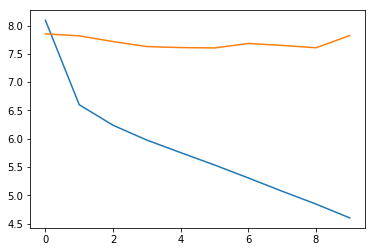

In [230]:
plot_loss(log_path_em, 10)

In [232]:
%run ../emotion_dialogue_model/inference --model ../emotion_dialogue_model/model/pre_em_0203_cleaning_10.mdl \
                    --data_dir ../data/em_dial/splitted/cleaning \
                    --vocab ../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

INFO:logger:Data directory: ../data/em_dial/splitted/cleaning
INFO:logger:Vocaburary file: ../data/twitter_dial/vocab/spvocab.model
INFO:logger:Model: ../emotion_dialogue_model/model/pre_em_0203_cleaning_10.mdl
INFO:logger:Use emotion: True
INFO:logger:SOS_id: 1
INFO:logger:hidden_size: 256
INFO:logger:EOS_id: 2
INFO:logger:tfd_lambda: 0.4
INFO:logger:batch_size: 1
INFO:logger:MAX_UTTR_LEN: 100
INFO:logger:beam_width: 5
INFO:logger:decay_step: 600000
INFO:logger:PAD_id: 0
INFO:logger:UNK_id: 3
INFO:logger:max_epoch: 30
INFO:logger:num_layers: 2
INFO:logger:lr_decay: 0.5773502691896258
INFO:logger:decoder_learning_ratio: 5.0
INFO:logger:l2_pooling: False
INFO:logger:len_alpha: 0.6
INFO:logger:teacher_forcing_ratio: 1.0
INFO:logger:use_emotion: True
INFO:logger:eos_gamma: 0.05
INFO:logger:learning_rate: 0.0001
INFO:logger:dropout: 0.1
INFO:logger:suppress_lambda: 1.0
INFO:logger:max_gradient: 50.0
INFO:logger:inf_last: False
INFO:logger.dataset:Reading files...
INFO:logger.dataset:Read 1

Loading the test dataset...
Read 186 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: 良いことってどんなこと?
tgt: 例えば掃除して部屋の環境を変えることで運気があがります
tgt_emotion: neutral
inf:  NONE
1[-1.05]: [数詞][人名!?掃除をしましょう。 
2[-1.34]: [数詞][人名!?掃除してください。 
3[-2.09]: [数詞][人名!?掃除をしましょう 

inf:  neutral
1[-1.04]: [数詞][人名!?掃除をしましょう。 
2[-1.30]: [数詞][人名!?掃除してください。 
3[-2.04]: [数詞][人名!?掃除をしましょう 

inf:  anger
1[-1.41]: [数詞][人名!?掃除してください。 
2[-2.17]: [数詞][人名ている! 
3[-2.55]: [数詞][人名!? 

inf:  sad
1[-1.07]: [数詞][人名]が掃除をしましょう。 
2[-1.15]: [数詞][人名]が掃除しようよ! 
3[-1.20]: [数詞][人名]が掃除をしましょう! 

inf:  happy
1[-1.38]: [数詞][人名!?掃除してください。 
2[-2.20]: [数詞][人名ている! 
3[-2.38]: [数詞][人名!? 

inf:  contentment
1[-1.10]: [数詞][人名]が掃除をしましょう。 
2[-1.12]: [数詞][人名]が掃除をしましょう! 
3[-1.14]: [数詞][人名]が掃除しようよ! 

Dial 2:
src: 例えば?
tgt: 虫に刺されてかゆくなったり、物は見つからなくなたり。
tgt_emotion: sad
inf:  NONE
1[-1.14]: [数詞][人名ているが掃除をしましょう! 
2[-1.19]: [数詞][人名ているが掃除をしましょう。 
3[-1.26]: [数詞][人名ているが掃除してください! 

inf:  neutral
1[-1.18]: [数詞][人名ているが掃除をしましょう。 
2[-1.19]: [数詞][人名ているが掃

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fe688636c50>>
Traceback (most recent call last):
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/queues.py", line 337, in get
    return ForkingPickler.loads(res)
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/resource_sharer.py", line 58, in detach
    return r

* using training data

In [233]:
%run ../emotion_dialogue_model/inference --model ../emotion_dialogue_model/model/pre_em_0203_cleaning_30.mdl \
                    --data_dir ../data/em_dial/splitted/cleaning \
                    --vocab ../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

INFO:logger:Data directory: ../data/em_dial/splitted/cleaning
INFO:logger:Vocaburary file: ../data/twitter_dial/vocab/spvocab.model
INFO:logger:Model: ../emotion_dialogue_model/model/pre_em_0203_cleaning_30.mdl
INFO:logger:Use emotion: True
INFO:logger:SOS_id: 1
INFO:logger:hidden_size: 256
INFO:logger:EOS_id: 2
INFO:logger:tfd_lambda: 0.4
INFO:logger:batch_size: 1
INFO:logger:MAX_UTTR_LEN: 100
INFO:logger:beam_width: 5
INFO:logger:decay_step: 600000
INFO:logger:PAD_id: 0
INFO:logger:UNK_id: 3
INFO:logger:max_epoch: 30
INFO:logger:num_layers: 2
INFO:logger:lr_decay: 0.5773502691896258
INFO:logger:decoder_learning_ratio: 5.0
INFO:logger:l2_pooling: False
INFO:logger:len_alpha: 0.6
INFO:logger:teacher_forcing_ratio: 1.0
INFO:logger:use_emotion: True
INFO:logger:eos_gamma: 0.05
INFO:logger:learning_rate: 0.0001
INFO:logger:dropout: 0.1
INFO:logger:suppress_lambda: 1.0
INFO:logger:max_gradient: 50.0
INFO:logger:inf_last: False
INFO:logger.dataset:Reading files...
INFO:logger.dataset:Read 1

Loading the test dataset...
Read 1515 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: それがなんだよ。
tgt: 自身の体臭が分からない男性に異性が引き付けられる事は皆無です。
tgt_emotion: NONE
inf:  NONE
1[-0.52]: 私は[数詞]分で終わる、掃除をしましょう。 
2[-0.75]: 私は[数詞]分で終わる、掃除をしてください。 
3[-0.77]: 私は[数詞]分で終わる、掃除をするだよ。 

inf:  neutral
1[-0.56]: 私は[数詞]分で終わる、掃除をしましょう。 
2[-0.81]: 私は[数詞]分で終わる、掃除をしてください。 
3[-0.82]: 私は[数詞]分で終わる、掃除をするだよ。 

inf:  anger
1[-0.57]: 私は[数詞]分で終わる、掃除をしましょう。 
2[-0.76]: 私は[数詞]分で終わる、掃除をしてください。 
3[-0.86]: 私は[数詞]分で終わる危ないじゃないですか。 

inf:  sad
1[-0.53]: 私は[数詞]分で終わる、掃除をしましょう。 
2[-0.85]: 私は[数詞]分で終わる。掃除をしましょうよ? 
3[-0.96]: 私は[数詞]分で終わるね。 

inf:  happy
1[-0.55]: 私は[数詞]分で終わる、掃除をしましょう。 
2[-0.77]: 私は[数詞]分で終わる、掃除をしてください。 
3[-0.78]: 私は[数詞]分で終わる、掃除をするだよ。 

inf:  contentment
1[-0.52]: 私は[数詞]分で終わる、掃除をしましょう。 
2[-0.78]: 私は[数詞]分で終わる。A自身が分からない男性の様臭はありますから! 
3[-0.91]: 私は[数詞]分で終わる。掃除をしましょうよ? 

Dial 2:
src: 掃除するのは俺だけなんだから、俺の好きなようにさせてくれよ。
tgt: でも、この前は綺麗な部屋は気持ちが良いって言ってたじゃないですか。
tgt_emotion: anger
inf:  NONE
1[-0.35]: それでは部屋が汚いと心は気持ちが良いって言

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fe68862bd68>>
Traceback (most recent call last):
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/queues.py", line 337, in get
    return ForkingPickler.loads(res)
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/resource_sharer.py", line 57, in detach
    with _re

In [234]:
%run ../emotion_dialogue_model/inference --model ../emotion_dialogue_model/model/pre_em_0203_cleaning_30.mdl \
                    --data_dir ../data/em_dial/splitted/cleaning \
                    --vocab ../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

INFO:logger:Data directory: ../data/em_dial/splitted/cleaning
INFO:logger:Vocaburary file: ../data/twitter_dial/vocab/spvocab.model
INFO:logger:Model: ../emotion_dialogue_model/model/pre_em_0203_cleaning_30.mdl
INFO:logger:Use emotion: True
INFO:logger:SOS_id: 1
INFO:logger:hidden_size: 256
INFO:logger:EOS_id: 2
INFO:logger:tfd_lambda: 0.4
INFO:logger:batch_size: 1
INFO:logger:MAX_UTTR_LEN: 100
INFO:logger:beam_width: 5
INFO:logger:decay_step: 600000
INFO:logger:PAD_id: 0
INFO:logger:UNK_id: 3
INFO:logger:max_epoch: 30
INFO:logger:num_layers: 2
INFO:logger:lr_decay: 0.5773502691896258
INFO:logger:decoder_learning_ratio: 5.0
INFO:logger:l2_pooling: False
INFO:logger:len_alpha: 0.6
INFO:logger:teacher_forcing_ratio: 1.0
INFO:logger:use_emotion: True
INFO:logger:eos_gamma: 0.05
INFO:logger:learning_rate: 0.0001
INFO:logger:dropout: 0.1
INFO:logger:suppress_lambda: 1.0
INFO:logger:max_gradient: 50.0
INFO:logger:inf_last: False
INFO:logger.dataset:Reading files...
INFO:logger.dataset:Read 1

Loading the test dataset...
Read 1515 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: もういいよ。
tgt: ちゃんと見て!
tgt_emotion: anger
inf:  NONE
1[-0.93]: いつも[数詞]分で終わる掃除してよ。 
2[-1.04]: いつも[人名]が掃除をしてください。 
3[-1.07]: いつも[人名]のためを思って掃除してよ! 

inf:  neutral
1[-0.75]: いつも[人名]のためを思って掃除するまで気分なようします? 
2[-1.04]: いつも[人名]のためを思って掃除してよ。 
3[-1.05]: いつも[数詞]週間以上ていますよ。 

inf:  anger
1[-0.82]: いつも[人名]のためを思って掃除してよ! 
2[-1.09]: いつも[人名]が掃除をしてください。 
3[-1.19]: いつも[人名]のために掃除しなさい! 

inf:  sad
1[-0.62]: 部屋[数詞]週間以上も掃除をします。 
2[-0.66]: 部屋[数詞]週間以上も掃除してよ。 
3[-0.91]: 部屋[数詞]週間以上てじゃないですか。 

inf:  happy
1[-0.94]: いつも[人名]のためを思って掃除してよ! 
2[-1.05]: いつも[人名]が掃除をしてください。 
3[-1.09]: いつも[人名]のためを思って掃除してよ。 

inf:  contentment
1[-1.03]: いつも[人名]が掃除をしてください。 
2[-1.04]: いつも[人名]のためを思って掃除してよ。 
3[-1.12]: いつも[人名]のためを思って掃除してよ! 

Dial 2:
src: 他には何をすればいい?
tgt: 掃除機をかけよう。
tgt_emotion: neutral
inf:  NONE
1[-1.46]: 私は[人名]のためになるじゃないですか。 
2[-1.52]: 私は[人名]のためになるじゃないですか! 
3[-1.70]: 掃除機をかけよう。 

inf:  neutral
1[-0.97]: 私は[人名]が掃除しないのを見るのが辛いじゃないです

Data directory: ../data/op_sub_dial/splitted

Vocaburary file: ../data/em_dial/vocab/spvocab.model

Model prefix: ./model/pre_op_0128



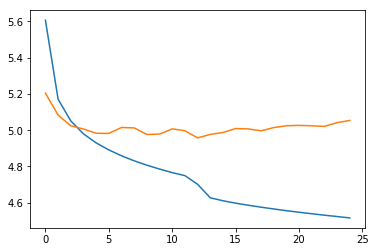

In [219]:
plot_loss(log_path_op,25)

In [187]:
%run ../emotion_dialogue_model/inference --model ../emotion_dialogue_model/model/pre_op_0128_13.mdl \
                    --data_dir ../data/op_sub_dial/splitted \
                    --vocab ../data/em_dial/vocab/spvocab.model\
                    --beam_width 5

INFO:logger:Data directory: ../data/op_sub_dial/splitted
INFO:logger:Vocaburary file: ../data/em_dial/vocab/spvocab.model
INFO:logger:Model: ../emotion_dialogue_model/model/pre_op_0128_13.mdl
INFO:logger:Use emotion: False
INFO:logger:SOS_id: 1
INFO:logger:num_layers: 2
INFO:logger:EOS_id: 2
INFO:logger:tfd_lambda: 0.4
INFO:logger:batch_size: 1
INFO:logger:beam_width: 5
INFO:logger:decay_step: 600000
INFO:logger:PAD_id: 0
INFO:logger:UNK_id: 3
INFO:logger:max_epoch: 100
INFO:logger:lr_decay: 0.5773502691896258
INFO:logger:hidden_size: 256
INFO:logger:decoder_learning_ratio: 5.0
INFO:logger:l2_pooling: False
INFO:logger:len_alpha: 0.6
INFO:logger:teacher_forcing_ratio: 1.0
INFO:logger:use_emotion: False
INFO:logger:eos_gamma: 0.05
INFO:logger:learning_rate: 0.0001
INFO:logger:dropout: 0.1
INFO:logger:suppress_lambda: 1.0
INFO:logger:max_gradient: 50.0
INFO:logger:MAX_UTTR_LEN: 100
INFO:logger:inf_last: False
INFO:logger.dataset:Reading files...
INFO:logger.dataset:Read 4933 dialogues


Loading the test dataset...
Read 4933 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: バカやろう
tgt: 残さず全部拾え
1[-1.73]: バカ 
2[-3.41]: バカ野郎 
3[-3.80]: マジ 
4[-3.90]: バカバカ 
5[-4.12]: 何 

Dial 2:
src: コオロギがいる
tgt: ああ
1[-2.83]: 何ですって 
2[-3.97]: コロニ 
3[-4.33]: コワコ 
4[-4.44]: どこ 
5[-4.54]: コロラド 

Dial 3:
src: 君の胃の中にある
tgt: ベーコン
1[-3.49]: そうだ 
2[-3.99]: そう 
3[-5.10]: 開けて 
4[-5.39]: 君 
5[-5.74]: 君ならやれる 

Dial 4:
src: よし、去る前に言いたいことはあるか
tgt: 噛めよ
1[-3.29]: ええ 
2[-3.42]: ああ 
3[-3.77]: いや 
4[-4.07]: いえ 
5[-5.88]: ああ、いや 

Dial 5:
src: 彼のリクエストだ
tgt: 殺せとは言われてないでしょ
1[-3.76]: ひどい 
2[-3.98]: どこで手に入れた 
3[-4.11]: どこで 
4[-4.22]: どこで見つけた 
5[-4.42]: こいつは 

Dial 6:
src: ありがとう
tgt: 見える
1[-2.62]: ありがとう 
2[-2.78]: どういたしまして 
3[-2.79]: どうも 
4[-3.50]: どう 
5[-3.63]: いい 

Dial 7:
src: テープを送って才能がないと言われたら
tgt: 君はものにならん
1[-3.83]: 父さん 
2[-4.56]: 出て行って 
3[-4.77]: どんな 
4[-5.16]: 出て行ってくれ 
5[-6.04]: もっと早く 

Dial 8:
src: ああちくしょう
tgt: 救済の希望を失った[人名]
1[-3.03]: クソ 
2[-3.32]: くそ 
3[-3.38]: やめて 
4[-3.60]: 畜生 
5[-5.40]:

Data directory: ../data/twitter_dial/extend

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/pre_twitter_0128



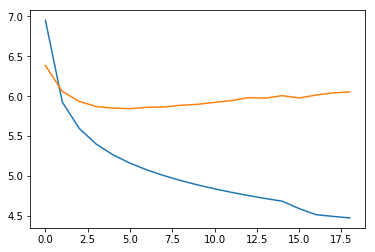

In [167]:
plot_loss(log_path_tw)

In [190]:
%run ../emotion_dialogue_model/inference --model ../emotion_dialogue_model/model/pre_twitter_0128_4.mdl \
                    --data_dir ../data/twitter_dial/splitted \
                    --vocab ../data/twitter_dial/vocab/spvocab.model\
                    --beam_width 5

INFO:logger:Data directory: ../data/twitter_dial/splitted
INFO:logger:Vocaburary file: ../data/twitter_dial/vocab/spvocab.model
INFO:logger:Model: ../emotion_dialogue_model/model/pre_twitter_0128_4.mdl
INFO:logger:Use emotion: False
INFO:logger:SOS_id: 1
INFO:logger:num_layers: 2
INFO:logger:EOS_id: 2
INFO:logger:tfd_lambda: 0.4
INFO:logger:batch_size: 1
INFO:logger:MAX_UTTR_LEN: 100
INFO:logger:beam_width: 5
INFO:logger:decay_step: 600000
INFO:logger:PAD_id: 0
INFO:logger:UNK_id: 3
INFO:logger:max_epoch: 100
INFO:logger:lr_decay: 0.5773502691896258
INFO:logger:hidden_size: 256
INFO:logger:decoder_learning_ratio: 5.0
INFO:logger:l2_pooling: False
INFO:logger:len_alpha: 0.6
INFO:logger:teacher_forcing_ratio: 1.0
INFO:logger:use_emotion: False
INFO:logger:eos_gamma: 0.05
INFO:logger:learning_rate: 0.0001
INFO:logger:dropout: 0.1
INFO:logger:suppress_lambda: 1.0
INFO:logger:max_gradient: 50.0
INFO:logger:inf_last: False
INFO:logger.dataset:Reading files...
INFO:logger.dataset:Read 5000 di

Loading the test dataset...
Read 5000 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: あっそー、じゃあ待ってろ、ちゃんと起きろよ
tgt: ついてくんなよ。遊ぶんだろ
1[-2.28]: ごめん、ゲルハルト先生が呼んでるんだ 
2[-2.96]: ごめん、ゲルハルト先生が呼んでるんだ。 
3[-3.30]: ごめん、ゲルハルト先生が呼んでるんだ。後で 
4[-3.65]: どうしたんだ 
5[-3.95]: ねえ 

Dial 2:
src: そんなことないよ。
tgt: ごめん、よく聞こえなかった。 そんなことより一緒に練習しようぜ
1[-4.20]: ありがとう 
2[-4.36]: そんなことない 
3[-4.66]: いやいや 
4[-5.33]: いやいやそんなことない 
5[-5.54]: いやいやそんなことないよ 

Dial 3:
src: 謝りすぎだってw ボムサーチワンチャンwwwww
tgt: せっかく一緒にイカできそうだったのに...... 安全シューズ履きたい......つらいww
1[-4.42]: 違います 
2[-5.74]: 違いますw 
3[-6.21]: 違いますwww 
4[-7.35]: ドサーチ 
5[-8.21]: ドレイン 

Dial 4:
src: そのリプ、 点やで、ゴルスタはゴミ
tgt: 君はハゲ
1[-2.28]: 英語 
2[-2.71]: うるせえ 
3[-2.99]: 数回繰り返す 
4[-3.10]: 来年もよろしく 
5[-4.48]: 来年もよろしく。 

Dial 5:
src: 今日のテスト終わりましたまだいってない感じだよね ずっとふわふわ貫いてきたから辛いよね、、 月面まんまるだから本当に月だよね失礼
tgt: お疲れ様 うん、たぶん、、、、 ギュムーン なんか髪切ってない情報出てるんだけど実話
1[-3.46]: お疲れ様 
2[-3.91]: お疲れ様です 
3[-4.51]: お疲れ 
4[-5.01]: 同じく 
5[-6.29]: お疲れ様〜 

Dial 6:
src: 今、7番ホールの前に着いた お腹空いた
tgt: 今そっち向かうねー♡
1[-3.

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fe6b74a9828>>
Traceback (most recent call last):
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/queues.py", line 337, in get
    return ForkingPickler.loads(res)
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/resource_sharer.py", line 58, in detach
    return r

In [ ]:
%run ../emotion_dialogue_model/inference --model ../emotion_dialogue_model/model/pre_twitter_0128_4.mdl \
                    --data_dir ../data/em_dial/splitted/cleaning \
                    --vocab ../data/twitter_dial/vocab/spvocab.model\
                    --beam_width 5

Data directory: ../data/em_dial/splitted/cleaning

Vocaburary file: ../data/em_dial/vocab/spvocab.model

Model prefix: ./model/pre_op13_fi_em_0128



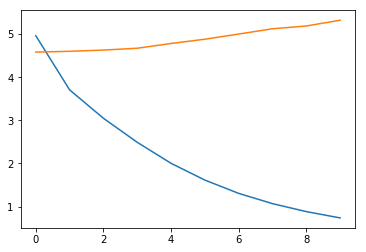

In [172]:
plot_loss(log_path_op_cl,10)

In [209]:
%run ../emotion_dialogue_model/inference --model ../emotion_dialogue_model/model/pre_op13_fi_em_0128_4.mdl \
                    --data_dir ../data/em_dial/splitted/cleaning \
                    --vocab ../data/em_dial/vocab/spvocab.model \
                    --use_emotion

INFO:logger:Data directory: ../data/em_dial/splitted/cleaning
INFO:logger:Vocaburary file: ../data/em_dial/vocab/spvocab.model
INFO:logger:Model: ../emotion_dialogue_model/model/pre_op13_fi_em_0128_4.mdl
INFO:logger:Use emotion: True
INFO:logger:SOS_id: 1
INFO:logger:hidden_size: 256
INFO:logger:EOS_id: 2
INFO:logger:tfd_lambda: 0.4
INFO:logger:batch_size: 1
INFO:logger:beam_width: 5
INFO:logger:decay_step: 600000
INFO:logger:PAD_id: 0
INFO:logger:MAX_UTTR_LEN: 100
INFO:logger:max_epoch: 50
INFO:logger:num_layers: 2
INFO:logger:lr_decay: 0.5773502691896258
INFO:logger:decoder_learning_ratio: 5.0
INFO:logger:l2_pooling: False
INFO:logger:len_alpha: 0.6
INFO:logger:teacher_forcing_ratio: 1.0
INFO:logger:use_emotion: True
INFO:logger:eos_gamma: 0.05
INFO:logger:learning_rate: 0.0001
INFO:logger:dropout: 0.1
INFO:logger:suppress_lambda: 1.0
INFO:logger:max_gradient: 50.0
INFO:logger:UNK_id: 3
INFO:logger:inf_last: False
INFO:logger.dataset:Reading files...
INFO:logger.dataset:Read 186 dial

Loading the test dataset...
Read 186 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: 僕はなんともないけどね。
tgt: 大変な事になっても知りませんよ。
tgt_emotion: anger
inf:  NONE
1[-0.86]: そんなことないよ!!!!!!!!!!!!!!!!!!!! 
2[-0.88]: そんなことないよ!!!!!!!!!!!!!!!!!!! 
3[-0.91]: そんなことないよ!!!!!!!!!!!!!!!!!! 

inf:  neutral
1[-0.57]: 僕は生活指導ロボットだからロボットでもある!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 
2[-0.58]: 僕は生活指導ロボットだからロボットでもある!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 
3[-0.59]: 僕は生活指導ロボットだからロボットでもある!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 

inf:  anger
1[-0.86]: そんなことないよ!!!!!!!!!!!!!!!!!!!! 
2[-0.87]: そんなことないよ!!!!!!!!!!!!!!!!!!! 
3[-0.90]: そんなことないよ!!!!!!!!!!!!!!!!!! 

inf:  sad
1[-0.88]: そんなことないよ!!!!!!!!!!!!!!!!!!!! 
2[-0.89]: そんなことないよ!!!!!!!!!!!!!!!!!!! 
3[-0.92]: そんなことないよ!!!!!!!!!!!!!!!!!! 

inf:  happy
1[-0.85]: そんなことないよ!!!!!!!!!!!!!!!!!!!!! 
2[-0.86]: そんなことないよ!!!!!!!!!!!!!!!!!!!! 
3[-0.88]: そんなことないよ!!!!!!!!!!!!!!!!!!! 

inf:  contentment
1[-0.83]: そんなことないよ!!!!!!!!!!!!!!!!!!!! 
2[-0.84]: そんなことない

inf:  NONE
1[-0.02]: こんなに汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い 
2[-0.07]: そんなことないよ!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 
3[-0.32]: そんなことないよ!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 

inf:  neutral
1[-0.02]: こんなに汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い 
2[-0.08]: そんなことないよ!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 
3[-0.31]: そんなことないよ!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 

inf:  anger
1[-0.02]: こんなに汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚

inf:  contentment
1[-0.08]: だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって 
2[-0.22]: だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって! 
3[-0.26]: だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だって だ

In [240]:
20**0.6

6.034176336545163

In [243]:
%run ../emotion_dialogue_model/inference --model ../emotion_dialogue_model/model/pre_op13_fi_em_0128_2.mdl \
                    --data_dir ../data/em_dial/splitted/cleaning \
                    --vocab ../data/em_dial/vocab/spvocab.model \
                    --use_emotion 

INFO:logger:Data directory: ../data/em_dial/splitted/cleaning
INFO:logger:Vocaburary file: ../data/em_dial/vocab/spvocab.model
INFO:logger:Model: ../emotion_dialogue_model/model/pre_op13_fi_em_0128_2.mdl
INFO:logger:Use emotion: True
INFO:logger:SOS_id: 1
INFO:logger:hidden_size: 256
INFO:logger:EOS_id: 2
INFO:logger:tfd_lambda: 0.4
INFO:logger:batch_size: 1
INFO:logger:beam_width: 5
INFO:logger:decay_step: 600000
INFO:logger:PAD_id: 0
INFO:logger:MAX_UTTR_LEN: 100
INFO:logger:max_epoch: 50
INFO:logger:num_layers: 2
INFO:logger:lr_decay: 0.5773502691896258
INFO:logger:decoder_learning_ratio: 5.0
INFO:logger:l2_pooling: False
INFO:logger:len_alpha: 0.6
INFO:logger:teacher_forcing_ratio: 1.0
INFO:logger:use_emotion: True
INFO:logger:eos_gamma: 0.05
INFO:logger:learning_rate: 0.0001
INFO:logger:dropout: 0.1
INFO:logger:suppress_lambda: 1.0
INFO:logger:max_gradient: 50.0
INFO:logger:UNK_id: 3
INFO:logger:inf_last: False
INFO:logger.dataset:Reading files...
INFO:logger.dataset:Read 186 dial

Loading the test dataset...
Read 186 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: 嫌だ。
tgt: じゃあ、私も手伝いますから。
tgt_emotion: NONE
inf:  NONE
1[-0.14]: もう!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 
2[-0.22]: もう!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 
3[-0.22]: もう!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 

inf:  neutral
1[-0.27]: もう!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 
2[-0.28]: もう!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 
3[-0.29]: もう!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 

inf:  anger
1[-0.14]: もう!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 
2[-0.22]: もう!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 
3[-0.22]: もう!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

inf:  anger
1[-0.09]: うん。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。 
2[-0.25]: うん。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。 
3[-0.25]: うん。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。 

inf:  sad
1[-0.09]: うん。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。 
2[-0.25]: うん。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。 
3[-0.25]: うん。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。 

inf:  happy
1[-0.09]: うん。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。 
2[-0.25]: うん。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。 
3[-0.25]: うん。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。

inf:  anger
1[-0.66]: そんな事言わずに掃除をしないと掃除機も掃除しろ。掃除をして掃除するんだ。掃除をする。。。掃除しよう! 
2[-0.82]: そんな事言わずに掃除をしないと掃除機も掃除しろ。掃除をして掃除するんだ。掃除をする。。。 
3[-0.86]: そんな事言わずに掃除をしないと掃除機も掃除しろ。掃除をして掃除するんだ。 

inf:  sad
1[-0.64]: そんな事言わずに掃除をしないと掃除機も掃除しろ。掃除をして掃除するんだ。掃除をする。。。掃除しよう! 
2[-0.82]: そんな事言わずに掃除をしないと掃除機も掃除しろ。掃除をして掃除するんだ。掃除をする。。。 
3[-0.87]: そんな事言わずに掃除をしないと掃除機も掃除しろ。掃除をして掃除するんだ。 

inf:  happy
1[-0.55]: そんな事言わずに掃除をしないと掃除機もかけるよ。掃除するんだよ。掃除しろ!掃除しなさい。掃除しよう? 
2[-0.58]: そんな事言わずに掃除をしないと掃除機もかけるよ。掃除するんだよ。掃除しろ!掃除しなさい。 
3[-0.61]: そんな事言わずに掃除をしないと掃除機もかけるよ。掃除するんだよ。掃除しろ!掃除しなさい! 

inf:  contentment
1[-0.90]: そんな事言わずに掃除をしないと掃除機もかけるよ。掃除しろ! 
2[-0.91]: そんな事言わずに掃除をしないと掃除機もかけるよ。 
3[-1.22]: そんな事言わずに掃除をしないと掃除機もかけるよ。掃除しろ。 

Dial 7:
src: 俺の部屋なんだし、勝手にさせてよ。
tgt: でも僕だっているじゃない。
tgt_emotion: sad
inf:  NONE
1[-0.17]: 部屋が汚いままが汚いままが汚いまま汚いまま汚いまま汚いまま汚いまま汚いまま汚い汚いまま汚い汚いまま汚い汚いまま汚いまま汚いまま汚いまま汚いまま汚いまま汚いまま汚いまま汚い汚いまま汚い汚いまま汚い汚い汚い汚いまま汚い汚いまま汚い汚いまま汚い汚いまま汚い汚いまま汚い汚い汚いまま汚い汚いまま汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い 
2[-0.17]: 部屋が汚いままが汚いままが汚いまま汚いまま汚いまま

inf:  sad
1[-0.03]: 少しずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつ 
2[-0.07]: 部屋が汚い部屋が汚い部屋が汚いが汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い 
3[-0.08]: 部屋が汚い部屋が汚い部屋が汚い汚い部屋が汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い 

inf:  happy
1[-0.03]: 少しずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつずつ 
2[-0.07]: 部屋が汚い部屋が汚い部屋が汚いが汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fe68862bb00>>
Traceback (most recent call last):
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/queues.py", line 337, in get
    return ForkingPickler.loads(res)
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/resource_sharer.py", line 57, in detach
    with _re

Data directory: ../data/em_dial/splitted/cleaning

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/pre_tw5_fi_clean_0129



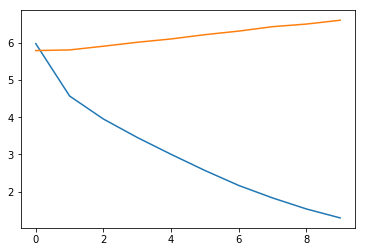

In [173]:
plot_loss(log_path_tw_cl, 10)

In [198]:
%run ../emotion_dialogue_model/inference --model ../emotion_dialogue_model/model/pre_tw5_fi_clean_0129_4.mdl \
                    --data_dir ../data/em_dial/splitted/cleaning \
                    --vocab ../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

INFO:logger:Data directory: ../data/em_dial/splitted/cleaning
INFO:logger:Vocaburary file: ../data/twitter_dial/vocab/spvocab.model
INFO:logger:Model: ../emotion_dialogue_model/model/pre_tw5_fi_clean_0129_4.mdl
INFO:logger:Use emotion: True
INFO:logger:SOS_id: 1
INFO:logger:hidden_size: 256
INFO:logger:EOS_id: 2
INFO:logger:tfd_lambda: 0.4
INFO:logger:batch_size: 1
INFO:logger:beam_width: 5
INFO:logger:decay_step: 600000
INFO:logger:PAD_id: 0
INFO:logger:MAX_UTTR_LEN: 100
INFO:logger:max_epoch: 50
INFO:logger:lr_decay: 0.5773502691896258
INFO:logger:decoder_learning_ratio: 5.0
INFO:logger:l2_pooling: False
INFO:logger:len_alpha: 0.6
INFO:logger:teacher_forcing_ratio: 1.0
INFO:logger:use_emotion: True
INFO:logger:eos_gamma: 0.05
INFO:logger:learning_rate: 0.0001
INFO:logger:num_layers: 2
INFO:logger:suppress_lambda: 1.0
INFO:logger:max_gradient: 50.0
INFO:logger:dropout: 0.1
INFO:logger:UNK_id: 3
INFO:logger:inf_last: False
INFO:logger.dataset:Reading files...
INFO:logger.dataset:Read 1

Loading the test dataset...
Read 186 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: えー?
tgt: 先ほどセンサー機能がゴミを感知してから既に[数詞]分が経過しています。
tgt_emotion: anger
inf:  NONE
1[-2.77]: そうですよ? 
2[-3.19]: 埃の中に落ちています。 
3[-3.29]: 埃の中に落ちてきました。 

inf:  neutral
1[-2.86]: そうですよ? 
2[-3.21]: 埃の中に落ちています。 
3[-3.27]: 埃の中に落ちてきました。 

inf:  anger
1[-2.94]: そうですよ? 
2[-3.21]: 埃の中に落ちています。 
3[-3.27]: そうですよ! 

inf:  sad
1[-2.47]: まずは床に埃だらけになるよ! 
2[-2.66]: まずは床に埃だらけになるよ。 
3[-2.73]: そうですよ? 

inf:  happy
1[-2.82]: そうですよ? 
2[-3.15]: まずは床掃除をしましょう。 
3[-3.19]: そうですよ! 

inf:  contentment
1[-2.53]: まずは床に埃だらけになるよ! 
2[-2.67]: まずは床に埃だらけになるよ? 
3[-2.71]: そうですよ? 

Dial 2:
src: 僕は喘息でもアトピーでもないから大丈夫だよ。
tgt: これだけ散らかっていては、移動するにも大変です。
tgt_emotion: sad
inf:  NONE
1[-1.96]: 喘息ではありません。きれいになると気持ちが明るく感じますね 
2[-2.02]: 喘息ではありません。きれいになると気持ちが明るく感じますよ 
3[-2.05]: 喘息ではありません。きれいになると気持ちが明るくなりますよ 

inf:  neutral
1[-2.06]: 喘息になったらきれいになるよ。 
2[-2.26]: 私は喘息ではありませんよ。掃除をしてくださいませましょう 
3[-2.78]: 私は喘息ではありませんよ。掃除をしないといけません 

inf:  anger
1[-1.98]:

Data directory: ../data/em_dial/splitted/all

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/pre_tw5_fi_all_0130



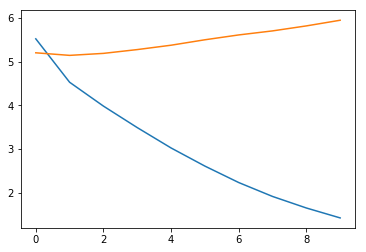

In [175]:
plot_loss(log_path_tw_all, 10)

In [197]:
%run ../emotion_dialogue_model/inference --model ../emotion_dialogue_model/model/pre_tw5_fi_all_0130_4.mdl \
                    --data_dir ../data/em_dial/splitted/cleaning \
                    --vocab ../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

INFO:logger:Data directory: ../data/em_dial/splitted/cleaning
INFO:logger:Vocaburary file: ../data/twitter_dial/vocab/spvocab.model
INFO:logger:Model: ../emotion_dialogue_model/model/pre_tw5_fi_all_0130_4.mdl
INFO:logger:Use emotion: True
INFO:logger:SOS_id: 1
INFO:logger:hidden_size: 256
INFO:logger:EOS_id: 2
INFO:logger:tfd_lambda: 0.4
INFO:logger:batch_size: 1
INFO:logger:beam_width: 5
INFO:logger:decay_step: 600000
INFO:logger:PAD_id: 0
INFO:logger:MAX_UTTR_LEN: 100
INFO:logger:max_epoch: 50
INFO:logger:lr_decay: 0.5773502691896258
INFO:logger:decoder_learning_ratio: 5.0
INFO:logger:dropout: 0.1
INFO:logger:l2_pooling: False
INFO:logger:len_alpha: 0.6
INFO:logger:teacher_forcing_ratio: 1.0
INFO:logger:use_emotion: True
INFO:logger:eos_gamma: 0.05
INFO:logger:learning_rate: 0.0001
INFO:logger:num_layers: 2
INFO:logger:suppress_lambda: 1.0
INFO:logger:max_gradient: 50.0
INFO:logger:inf_last: False
INFO:logger:UNK_id: 3
INFO:logger.dataset:Reading files...
INFO:logger.dataset:Read 186

Loading the test dataset...
Read 186 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: そんなこと言っていないだろ。
tgt: 言っているのも同じだよ、掃除してくれなきゃ。
tgt_emotion: anger
inf:  NONE
1[-0.47]: 私は[人名]のためを思って言っているのです。 
2[-0.70]: [人名]のためを思って言っているのです。 
3[-0.93]: [人名]のためを思って言っているのに。 

inf:  neutral
1[-0.44]: 私は[人名]のためを思って言っているのです。 
2[-0.66]: [人名]のためを思って言っているのです。 
3[-0.93]: [人名]のためを思って言っているのに。 

inf:  anger
1[-0.63]: 私は[人名]のためを思って言っているのです。 
2[-0.64]: 私は[人名]のためを思って言っているのです! 
3[-0.86]: [人名]のためを思って言っているのです。 

inf:  sad
1[-0.49]: 私は[人名]のためを思って言っているのです。 
2[-0.73]: [人名]のためを思って言っているのです。 
3[-0.94]: 私は[人名]のためを思って言っているのに。 

inf:  happy
1[-0.53]: 私は[人名]のためを思って言っているのです。 
2[-0.84]: 私は[人名]のためを思って言っているのです! 
3[-1.19]: 私は[人名]のためなのです。 

inf:  contentment
1[-0.45]: 私は[人名]のためを思って言っているのです。 
2[-0.69]: [人名]のためを思って言っているのです。 
3[-0.91]: [人名]のためを思って言っているのに。 

Dial 2:
src: 便利だねえ。
tgt: [人名]、そろそろ部屋が汚くなってきました。部屋の掃除をした方がよいですね。
tgt_emotion: neutral
inf:  NONE
1[-0.51]: [数詞][人名]のためを思って言っているのです! 
2[-0.52]: [数詞][人名]のためを思って言っているのです。

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fe6901182b0>>
Traceback (most recent call last):
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/queues.py", line 337, in get
    return ForkingPickler.loads(res)
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/resource_sharer.py", line 57, in detach
    with _re

In [207]:
%run ../emotion_dialogue_model/inference --model ../emotion_dialogue_model/model/pre_tw5_fi_all_0130_6.mdl \
                    --data_dir ../data/em_dial/splitted/cleaning \
                    --vocab ../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

INFO:logger:Data directory: ../data/em_dial/splitted/cleaning
INFO:logger:Vocaburary file: ../data/twitter_dial/vocab/spvocab.model
INFO:logger:Model: ../emotion_dialogue_model/model/pre_tw5_fi_all_0130_6.mdl
INFO:logger:Use emotion: True
INFO:logger:SOS_id: 1
INFO:logger:hidden_size: 256
INFO:logger:EOS_id: 2
INFO:logger:tfd_lambda: 0.4
INFO:logger:batch_size: 1
INFO:logger:beam_width: 5
INFO:logger:decay_step: 600000
INFO:logger:PAD_id: 0
INFO:logger:MAX_UTTR_LEN: 100
INFO:logger:max_epoch: 50
INFO:logger:lr_decay: 0.5773502691896258
INFO:logger:decoder_learning_ratio: 5.0
INFO:logger:dropout: 0.1
INFO:logger:l2_pooling: False
INFO:logger:len_alpha: 0.6
INFO:logger:teacher_forcing_ratio: 1.0
INFO:logger:use_emotion: True
INFO:logger:eos_gamma: 0.05
INFO:logger:learning_rate: 0.0001
INFO:logger:num_layers: 2
INFO:logger:suppress_lambda: 1.0
INFO:logger:max_gradient: 50.0
INFO:logger:inf_last: False
INFO:logger:UNK_id: 3
INFO:logger.dataset:Reading files...
INFO:logger.dataset:Read 186

Loading the test dataset...
Read 186 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: じゃあ部屋の掃除をロボットにやらせる方法とかのデータもある?
tgt: それはありませんが、掃除をしない人のデータを載せるブラックリストならあります。
tgt_emotion: NONE
inf:  NONE
1[-0.43]: [数詞][人名]の生活改善するためにゲームを止めてほしいのです。 
2[-0.59]: [数詞][人名]のためにゲームを止めてくれるんです。 
3[-0.83]: [人名]のためにゲームを止めてくれているのでしょうか? 

inf:  neutral
1[-0.61]: [数詞][人名]のためにゲームを止めてくれるんです。 
2[-0.65]: それでは[数詞]分経ちますよ。 
3[-0.72]: それでは[数詞]分経ちましたよ。 

inf:  anger
1[-0.60]: [数詞][人名]のためにゲームを止めてくれるんです。 
2[-0.64]: [数詞][人名]のためにゲームを止めているのでしょうか? 
3[-0.83]: [人名]のためにゲームを止めてくれているのでしょうか? 

inf:  sad
1[-0.81]: [人名]のためにゲームを止めていると悲しいです。 
2[-0.88]: [人名]がゲームを止めていると悲しいです。 
3[-1.04]: [人名]のためにゲームを止めてほしいのです。 

inf:  happy
1[-0.61]: [数詞][人名]のためにゲームを止めてくれるんです。 
2[-0.67]: それでは[数詞]分経ちますよ。 
3[-0.75]: それでは[数詞]分経ちましたよ。 

inf:  contentment
1[-0.88]: [人名]がゲームを止めていると悲しいです。 
2[-1.04]: [人名]のためにゲームを止めてくれるんです。 
3[-1.12]: [人名]の生活改善するためにゲームを止めてほしいの。 

Dial 2:
src: それに?
tgt: 虫が湧きますよ?黒光りするアレとか。
tgt_emotion: sad
inf:  NONE
1[-1.26]: [人名]のこ

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fe6885f2978>>
Traceback (most recent call last):
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/queues.py", line 337, in get
    return ForkingPickler.loads(res)
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/resource_sharer.py", line 57, in detach
    with _re

Data directory: ../data/em_dial/splitted/cleaning

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/pre_tw5_fi_all_fi_clean_0130



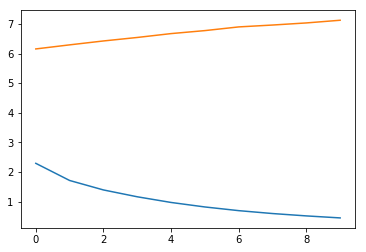

In [211]:
plot_loss(log_path_tw_all_cl, 10)

In [212]:
%run ../emotion_dialogue_model/inference --model ../emotion_dialogue_model/model/pre_tw5_fi_all_fi_clean_0130_2.mdl \
                    --data_dir ../data/em_dial/splitted/cleaning \
                    --vocab ../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

INFO:logger:Data directory: ../data/em_dial/splitted/cleaning
INFO:logger:Vocaburary file: ../data/twitter_dial/vocab/spvocab.model
INFO:logger:Model: ../emotion_dialogue_model/model/pre_tw5_fi_all_fi_clean_0130_2.mdl
INFO:logger:Use emotion: True
INFO:logger:SOS_id: 1
INFO:logger:num_layers: 2
INFO:logger:EOS_id: 2
INFO:logger:tfd_lambda: 0.4
INFO:logger:batch_size: 1
INFO:logger:beam_width: 5
INFO:logger:decay_step: 600000
INFO:logger:PAD_id: 0
INFO:logger:MAX_UTTR_LEN: 100
INFO:logger:max_epoch: 50
INFO:logger:lr_decay: 0.5773502691896258
INFO:logger:hidden_size: 256
INFO:logger:decoder_learning_ratio: 5.0
INFO:logger:l2_pooling: False
INFO:logger:len_alpha: 0.6
INFO:logger:teacher_forcing_ratio: 1.0
INFO:logger:use_emotion: True
INFO:logger:eos_gamma: 0.05
INFO:logger:learning_rate: 0.0001
INFO:logger:dropout: 0.1
INFO:logger:suppress_lambda: 1.0
INFO:logger:max_gradient: 50.0
INFO:logger:UNK_id: 3
INFO:logger:inf_last: False
INFO:logger.dataset:Reading files...
INFO:logger.dataset

Loading the test dataset...
Read 186 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: えっ、それは困るよ、こんな部屋見られたら怒られるよ。
tgt: 私もA君が怒られる姿を見たくはありませんよ。
tgt_emotion: sad
inf:  NONE
1[-1.43]: 部屋が汚いと身体に悪いんだよ。 
2[-1.85]: 部屋が汚いと身体に悪いし。 
3[-2.28]: ほら、今すぐ掃除しようよ。 

inf:  neutral
1[-2.30]: ほら、今すぐ掃除しようよ。 
2[-2.54]: ほら、今すぐ片付けなさい。 
3[-2.61]: ほら、今すぐ掃除しなさい。 

inf:  anger
1[-1.96]: いいえ、今すぐ掃除してください。 
2[-2.05]: いいえ、今すぐ片付けなさい。 
3[-2.28]: ほら、今すぐ掃除しようよ! 

inf:  sad
1[-1.78]: 私は部屋が片付けて掃除をしないの? 
2[-2.03]: ほら、今すぐ掃除をしてください。 
3[-2.28]: ほら、今すぐ掃除しようよ。 

inf:  happy
1[-1.48]: 部屋が汚いと身体に悪いんだよ。 
2[-1.87]: 部屋が汚いと身体に悪いし。 
3[-2.13]: ほら、今すぐ掃除しようよ! 

inf:  contentment
1[-1.12]: 部屋が汚れていると身体に良くないんだよ。 
2[-1.13]: 部屋が汚れていると身体に良くないよ。 
3[-1.78]: 部屋が汚いと身体に悪いし。 

Dial 2:
src: 例えば?
tgt: 風邪をひきやすくなったり、ハウスダストから来る鼻炎とか
tgt_emotion: sad
inf:  NONE
1[-2.25]: 風邪ひきやすくなったりすると頭痛くなります 
2[-2.52]: 風邪ひきますよ。 
3[-2.55]: 風邪ひきますよ 

inf:  neutral
1[-2.51]: 風邪ひき始めましょう。 
2[-2.64]: 風邪ひきますよ 
3[-2.75]: 風邪ひきますよ。 

inf:  anger
1[-2.26]: 風邪ひきますよ。 
2[

In [244]:
%run ../emotion_dialogue_model/inference --model ../emotion_dialogue_model/model/pre_tw5_fi_all_fi_clean_0130_5.mdl \
                    --data_dir ../data/em_dial/splitted/cleaning \
                    --vocab ../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

INFO:logger:Data directory: ../data/em_dial/splitted/cleaning
INFO:logger:Vocaburary file: ../data/twitter_dial/vocab/spvocab.model
INFO:logger:Model: ../emotion_dialogue_model/model/pre_tw5_fi_all_fi_clean_0130_5.mdl
INFO:logger:Use emotion: True
INFO:logger:SOS_id: 1
INFO:logger:num_layers: 2
INFO:logger:EOS_id: 2
INFO:logger:tfd_lambda: 0.4
INFO:logger:batch_size: 1
INFO:logger:beam_width: 5
INFO:logger:decay_step: 600000
INFO:logger:PAD_id: 0
INFO:logger:MAX_UTTR_LEN: 100
INFO:logger:max_epoch: 50
INFO:logger:lr_decay: 0.5773502691896258
INFO:logger:hidden_size: 256
INFO:logger:decoder_learning_ratio: 5.0
INFO:logger:l2_pooling: False
INFO:logger:len_alpha: 0.6
INFO:logger:teacher_forcing_ratio: 1.0
INFO:logger:use_emotion: True
INFO:logger:eos_gamma: 0.05
INFO:logger:learning_rate: 0.0001
INFO:logger:dropout: 0.1
INFO:logger:suppress_lambda: 1.0
INFO:logger:max_gradient: 50.0
INFO:logger:UNK_id: 3
INFO:logger:inf_last: False
INFO:logger.dataset:Reading files...
INFO:logger.dataset

Loading the test dataset...
Read 186 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: あっはい、片付けます。
tgt: わかればよろしい。
tgt_emotion: NONE
inf:  NONE
1[-1.46]: 片付けたら進めるんだけどなぁ。 
2[-1.65]: 片付けたら進めるんだけどなぁ? 
3[-1.75]: でも片付けられない前に掃除してください。 

inf:  neutral
1[-1.41]: 片付けたら進めるんだけどなぁ? 
2[-1.57]: 片付けたら進めるんだけどなぁ。 
3[-1.60]: わかりました。片付けたら進めるんだけどなぁ? 

inf:  anger
1[-1.47]: でも片付けられない前に掃除してください。 
2[-1.58]: 片付けたら進めるんだけどなぁ。 
3[-1.64]: でも片付けられない前に片づけて下さい。 

inf:  sad
1[-1.60]: 片付けたら進めるんだけどなぁ。 
2[-1.95]: でも片付けたら進めるんだけどなぁ。 
3[-2.20]: 片付けたら進めるんだけどなぁ? 

inf:  happy
1[-1.47]: 片付けたら進めるんだけどなぁ? 
2[-1.68]: わかりました。片付けたら進めるんだけどなぁ? 
3[-1.73]: 片付けたら進めるんだけどなぁ。 

inf:  contentment
1[-1.01]: でも片付けていたら部屋が汚いままでだらけになります。 
2[-1.43]: 片付けたら進めるんだけどなぁ。 
3[-1.78]: でも片付けたら進めるんだけどなぁ。 

Dial 2:
src: 僕は気にならないよ。
tgt: 埃は喘息やアトピーの発作の原因になりますよ。
tgt_emotion: neutral
inf:  NONE
1[-0.86]: すごく部屋が汚れているとは思わないのですか? 
2[-1.84]: すごく汚くなるよ。 
3[-2.08]: そろそろ掃除したほうが良いですよ! 

inf:  neutral
1[-0.93]: すごく部屋が汚れているとは思わないのですか? 
2[-1.89]: すごく汚くなるよ。 


In [245]:
%run ../emotion_dialogue_model/inference --model ../emotion_dialogue_model/model/pre_tw5_fi_all_fi_clean_0130_2.mdl \
                    --data_dir ../data/em_dial/splitted/cleaning \
                    --vocab ../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

INFO:logger:Data directory: ../data/em_dial/splitted/cleaning
INFO:logger:Vocaburary file: ../data/twitter_dial/vocab/spvocab.model
INFO:logger:Model: ../emotion_dialogue_model/model/pre_tw5_fi_all_fi_clean_0130_2.mdl
INFO:logger:Use emotion: True
INFO:logger:SOS_id: 1
INFO:logger:num_layers: 2
INFO:logger:EOS_id: 2
INFO:logger:tfd_lambda: 0.4
INFO:logger:batch_size: 1
INFO:logger:beam_width: 5
INFO:logger:decay_step: 600000
INFO:logger:PAD_id: 0
INFO:logger:MAX_UTTR_LEN: 100
INFO:logger:max_epoch: 50
INFO:logger:lr_decay: 0.5773502691896258
INFO:logger:hidden_size: 256
INFO:logger:decoder_learning_ratio: 5.0
INFO:logger:l2_pooling: False
INFO:logger:len_alpha: 0.6
INFO:logger:teacher_forcing_ratio: 1.0
INFO:logger:use_emotion: True
INFO:logger:eos_gamma: 0.05
INFO:logger:learning_rate: 0.0001
INFO:logger:dropout: 0.1
INFO:logger:suppress_lambda: 1.0
INFO:logger:max_gradient: 50.0
INFO:logger:UNK_id: 3
INFO:logger:inf_last: False
INFO:logger.dataset:Reading files...
INFO:logger.dataset

Loading the test dataset...
Read 186 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: そうかな 僕には同じに見えるけどな
tgt: 疑うなら先週の部屋の画像をお見せしましょうか?
tgt_emotion: anger
inf:  NONE
1[-3.04]: そうだよ 
2[-3.11]: そうだよ? 
3[-3.15]: そうだよ! 

inf:  neutral
1[-3.05]: そうだよ? 
2[-3.15]: そうだよ 
3[-3.41]: そうだよ。見えるところは僕と暮らしてるよ 

inf:  anger
1[-2.45]: そうだよ! 
2[-3.20]: そうだよ 
3[-3.40]: そうだよ!健康にも良くないよ 

inf:  sad
1[-2.89]: そうだよ 
2[-3.01]: そうだよ。見えるところは僕と暮らしてるよ 
3[-3.39]: そうだよ? 

inf:  happy
1[-2.69]: そうだよ! 
2[-3.10]: そうだよ 
3[-3.23]: そうだよ? 

inf:  contentment
1[-3.00]: そうだよ 
2[-3.17]: そうだよ。見えるところは僕と暮らしてるよ 
3[-3.18]: そうだよ? 

Dial 2:
src: ケケケ
tgt: もう僕は悲しいよ!人間という生き物が悲しいよ!
tgt_emotion: sad
inf:  NONE
1[-1.44]: そうでしょう!掃除しないで差し上げましょう。 
2[-1.51]: そうでしょう!掃除しないで差し上げようかと思っています。 
3[-2.16]: そうでしょう!掃除しないで差し上げようか? 

inf:  neutral
1[-1.49]: そうでしょう!掃除しないで差し上げましょう。 
2[-1.55]: そうでしょう!掃除しないで差し上げようかと思っています。 
3[-2.25]: そうでしょう!掃除しないで差し上げようか? 

inf:  anger
1[-2.43]: うるさいとは何ですか! 
2[-2.92]: そう言わずに掃除しなさい! 
3[-3.03]: そう言わずに掃除しませんか? 

i